In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
House_data = pd.read_csv(r"C:\Users\HP\Documents\ML, AI and DL\housing_data.csv")

In [3]:
House_data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [4]:
House_data.shape

(20640, 10)

In [5]:
House_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
House_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [7]:
#checking missing values
House_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
# Identify Empty Cells
# Empty cells include: blank strings (''), whitespace (' '), None, and NaN
empty_cells = House_data.isnull() | (House_data.applymap(lambda x: isinstance(x, str) and x.strip() == ''))

print("\nEmpty Cells (True = Empty):")
print(empty_cells)

# Locate Positions of Empty Cells
empty_positions = [(row, col) for row, col in zip(*np.where(empty_cells.values))]

print("\nPositions of Empty Cells (row, column):")
print(empty_positions)


Empty Cells (True = Empty):
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0          False     False               False        False           False   
1          False     False               False        False           False   
2          False     False               False        False           False   
3          False     False               False        False           False   
4          False     False               False        False           False   
...          ...       ...                 ...          ...             ...   
20635      False     False               False        False           False   
20636      False     False               False        False           False   
20637      False     False               False        False           False   
20638      False     False               False        False           False   
20639      False     False               False        False           False   

       population  hou

In [9]:
#theres a difference between empty cell and nan... if cell is empty, Imputer wont work
#Handling the empty cell in total bedrrom that prevents it from having a skew value.....
#we'll have use an imputer (i.e from sklearn.impute import SimpleImputer) to fill the missing values if it is 'NaN' values in the cell that is to be filled. but it is an empty cell in this data

value='nan'
result=House_data[House_data['total_bedrooms']==value]
print(result)

Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity]
Index: []


In [10]:
#drop the null values cos we cant guess blindly since each variable is real
#House_data.dropna(inplace=True)

In [11]:
# fill empty cells under total bedroom with mean using fillna()
x=House_data['total_bedrooms'].mean()
House_data['total_bedrooms'].fillna(x,inplace=True)

In [12]:
House_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [13]:
House_data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [14]:
House_data.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20640.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        419.266592   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.000000    787.000000    280.000000       2.563400   
50%        438.000000   1166.000000    409.000000       3.534800   
75%        643.250000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

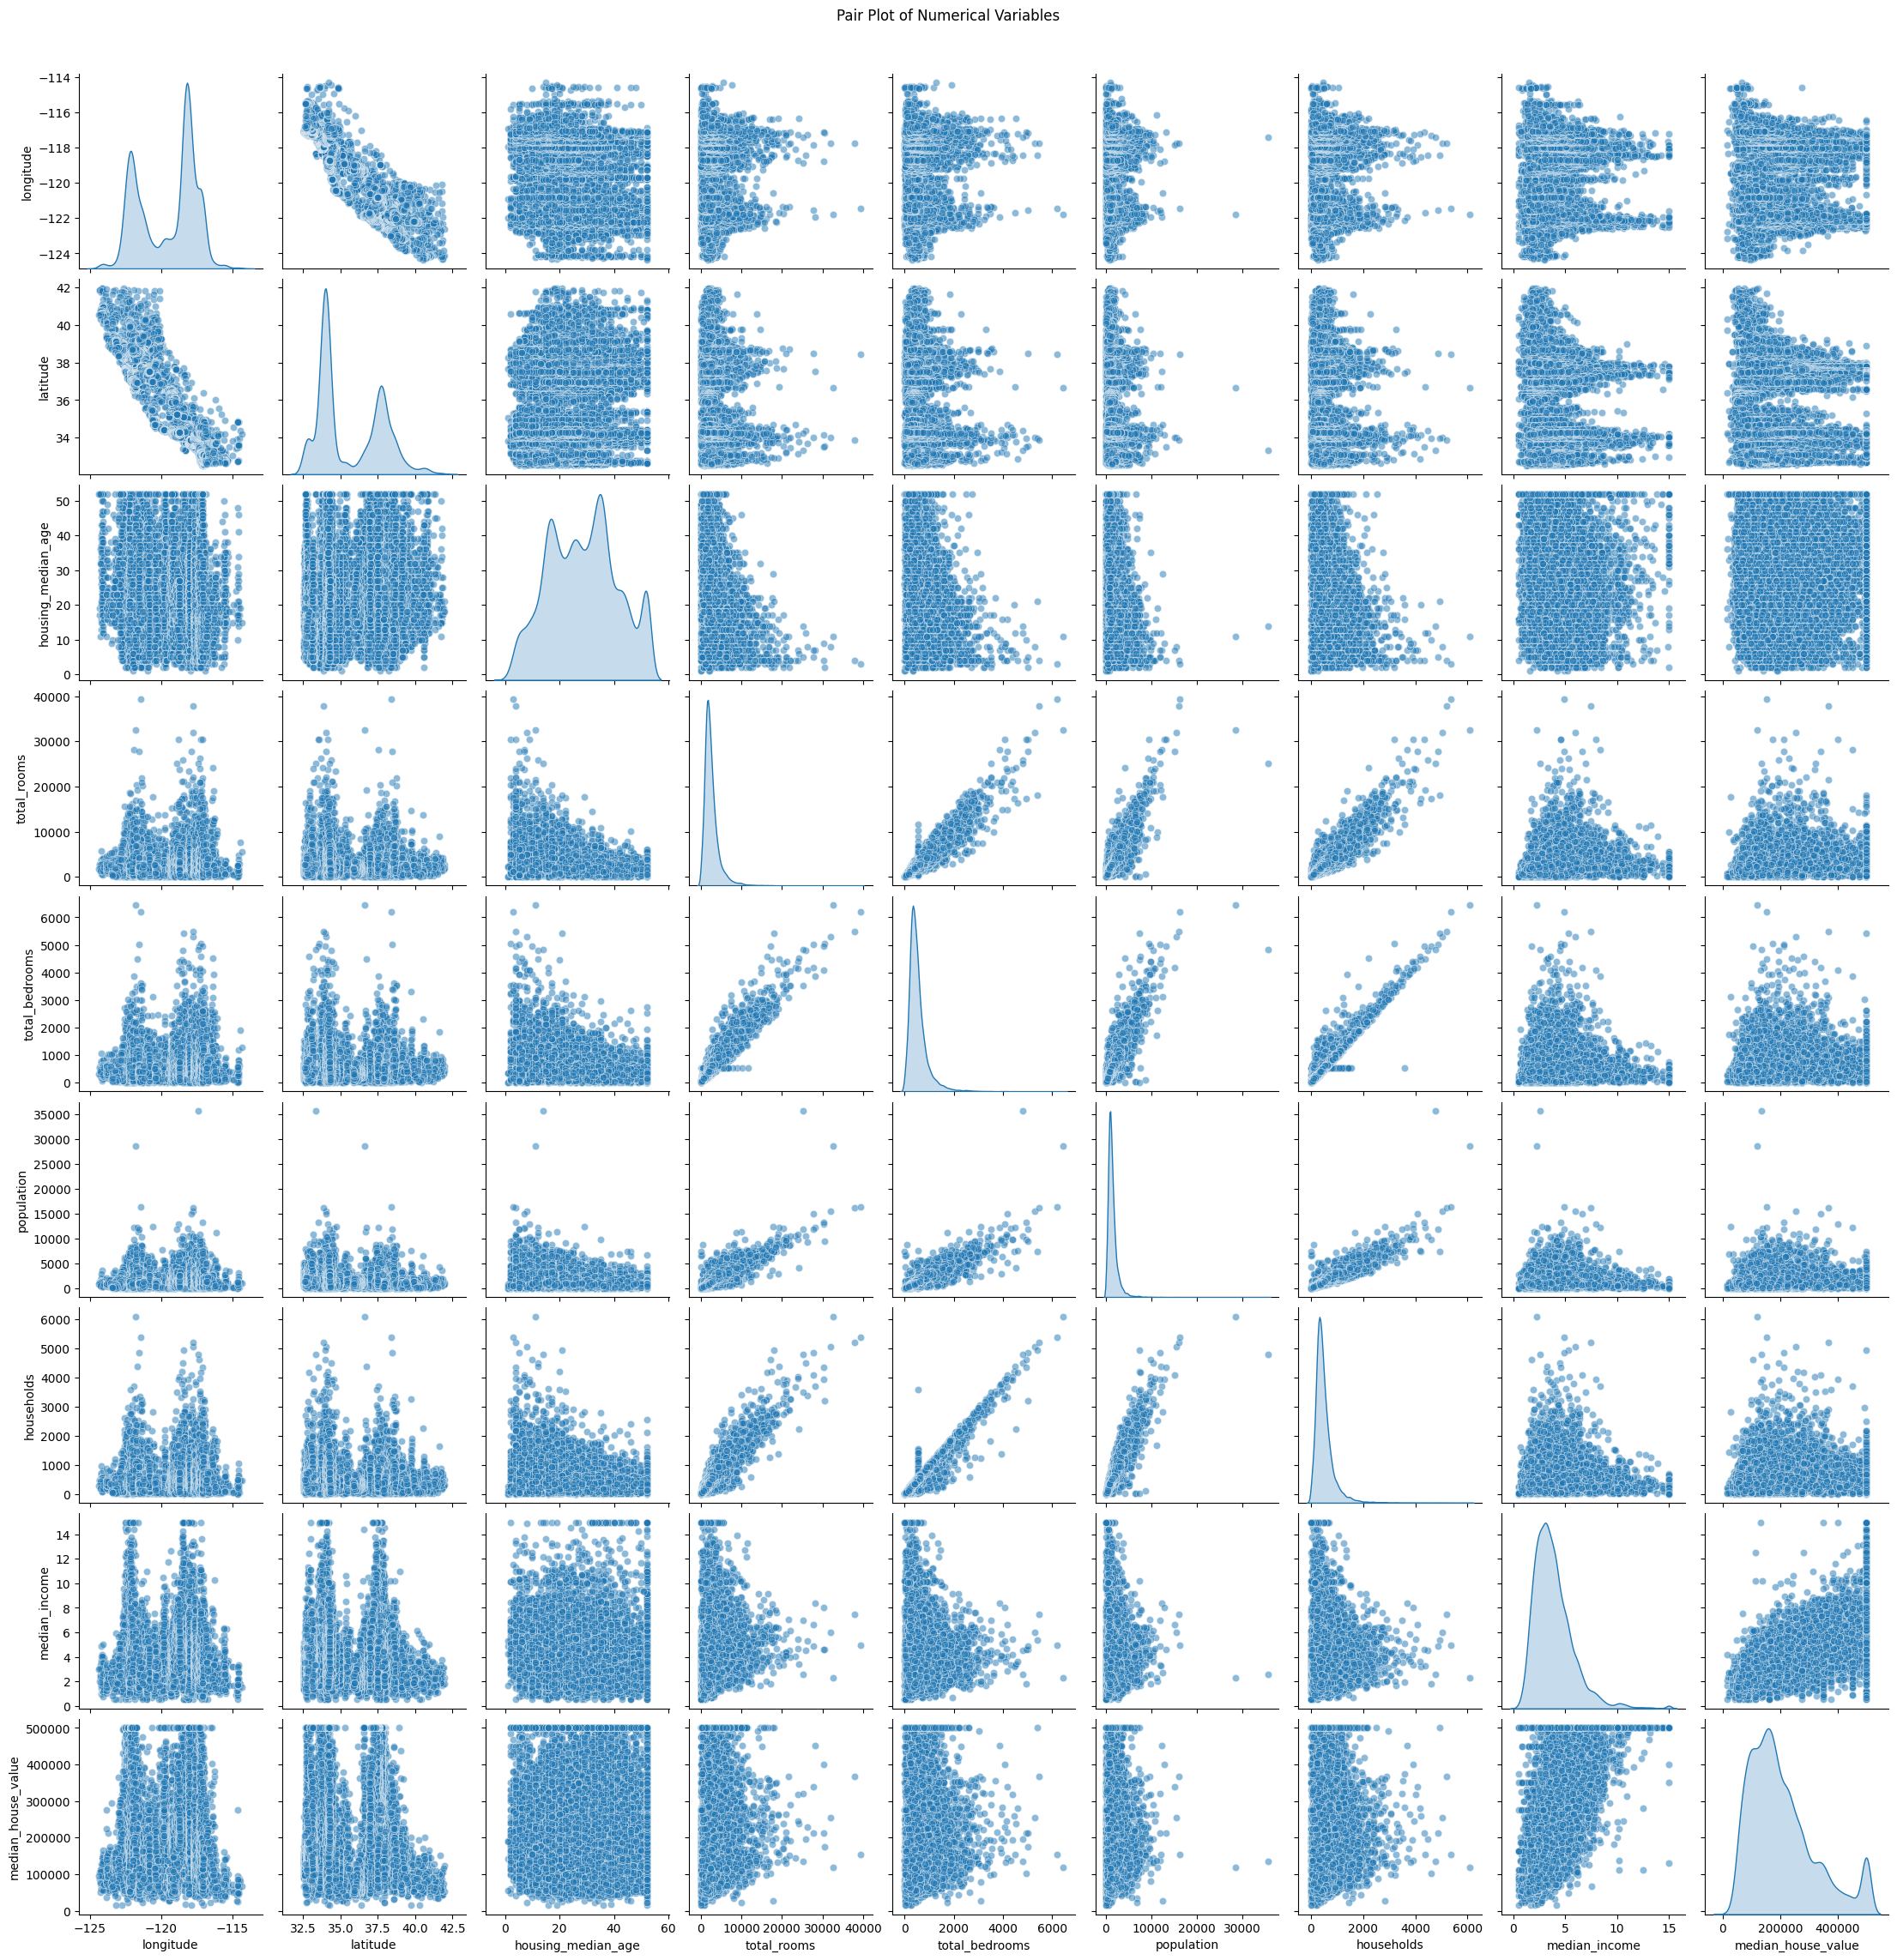

In [15]:
# Drop non-numeric columns (if needed)
numeric_columns = House_data.select_dtypes(include=['float64', 'int64']).columns

# Create a pair plot
sns.pairplot(House_data[numeric_columns], diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle("Pair Plot of Numerical Variables", y=1.02)
plt.show()

In [16]:
# inspecting the linearity and non linearity, it is observed that household, population, total room and total bedroom seem not to be linear. 
# Also, median income is suspected but will be confirmed by checking the correlation table

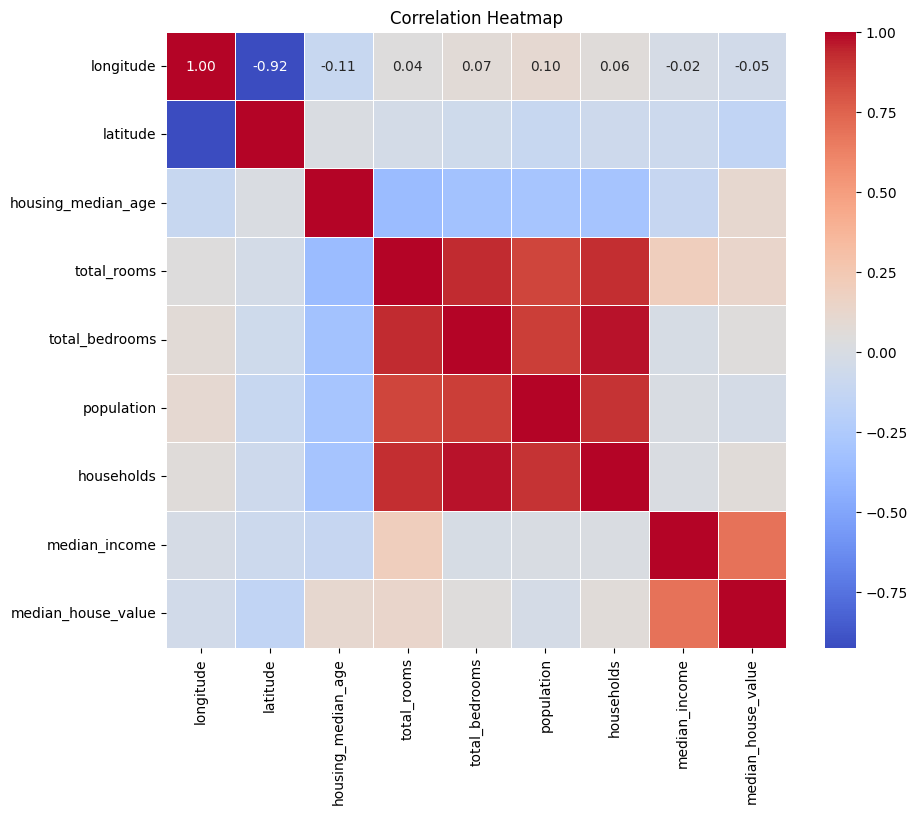

In [17]:
# Compute the correlation matrix
correlation_matrix = House_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [18]:
House_data.corr()

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069260 -0.066658           -0.318998     0.927253   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069260    0.099773    0.055310      -0.015176   
latitude                 -0.066658   -0.108785   -0.071035      -0.079809   
housing_median_age       -0.318998   -0.296244   -0.302916      -0.119034   
total_rooms               0.927253    0.857126    0.918484       0.198050   
total_bedrooms            1.000000    0.873910    0.974725      -0.007682   
population                0.873910    1.000000    0.907222       0.004834   
households                0.974725    0.907222    1.000000       0.013033   
median_income            -0.007682    0.004834    0.013033       1.000000   
median_house_value        0.049454   -0.024650    0.065843       0.688075   

                    median_house_value  
longitude                    -0.045967  
latitude                     -0.144160  
housing_median_age            0.105623  
total_rooms                   0.134153  
total_bedrooms                0.049454  
population                   -0.024650  
households                    0.065843  
median_income                 0.688075  
median_house_value            1.000000

In [19]:
# The correlation coefficient aligns with linearity test above: household, population, total bedroom, longitude seems to have correlation < 0.1
# some features to features are highly correlated e.g lattitude to longitude, total room to total bedroom, total room to population, total room to household,
# total bedroom to household, total bedroom to population, total bedroom to total room,

In [20]:
# For the distribution of data on the histogram, almost all data are abnormally distributed... 
# Check skewness and maybe correct too

In [21]:
# Calculate skewness for each column
skewness = House_data.skew()

# Display skewness values
print("Skewness of each column:")
print(skewness)

Skewness of each column:
longitude            -0.297801
latitude              0.465953
housing_median_age    0.060331
total_rooms           4.147343
total_bedrooms        3.477023
population            4.935858
households            3.410438
median_income         1.646657
median_house_value    0.977763
dtype: float64


In [22]:
# For cube root transformation on longitude to balance abnormal didtribution
House_data['longitude_cbrt'] = np.cbrt(House_data['longitude'])

In [23]:
# Calculate skewness for each column
skewness = House_data.skew()

# Display skewness values
print("Skewness of each column:")
print(skewness)

Skewness of each column:
longitude            -0.297801
latitude              0.465953
housing_median_age    0.060331
total_rooms           4.147343
total_bedrooms        3.477023
population            4.935858
households            3.410438
median_income         1.646657
median_house_value    0.977763
longitude_cbrt       -0.288030
dtype: float64


In [24]:
# For cube root transformation on latitude to balance abnormal didtribution
House_data['latitude_cbrt'] = np.cbrt(House_data['latitude'])

In [25]:
# Calculate skewness for each column
skewness = House_data.skew()

# Display skewness values
print("Skewness of each column:")
print(skewness)

Skewness of each column:
longitude            -0.297801
latitude              0.465953
housing_median_age    0.060331
total_rooms           4.147343
total_bedrooms        3.477023
population            4.935858
households            3.410438
median_income         1.646657
median_house_value    0.977763
longitude_cbrt       -0.288030
latitude_cbrt         0.428036
dtype: float64


In [26]:
House_data['total_rooms_cbrt'] = np.cbrt(House_data['total_rooms'])

In [27]:
# Calculate skewness for each column
skewness = House_data.skew()

# Display skewness values
print("Skewness of each column:")
print(skewness)

Skewness of each column:
longitude            -0.297801
latitude              0.465953
housing_median_age    0.060331
total_rooms           4.147343
total_bedrooms        3.477023
population            4.935858
households            3.410438
median_income         1.646657
median_house_value    0.977763
longitude_cbrt       -0.288030
latitude_cbrt         0.428036
total_rooms_cbrt      0.629034
dtype: float64


In [28]:
House_data.corr()

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069260 -0.066658           -0.318998     0.927253   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   
longitude_cbrt       0.999991 -0.924614           -0.108379     0.044744   
latitude_cbrt       -0.926719  0.999876            0.012961    -0.035993   
total_rooms_cbrt     0.036025 -0.034678           -0.360885     0.910129   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069260    0.099773    0.055310      -0.015176   
latitude                 -0.066658   -0.108785   -0.071035      -0.079809   
housing_median_age       -0.318998   -0.296244   -0.302916      -0.119034   
total_rooms               0.927253    0.857126    0.918484       0.198050   
total_bedrooms            1.000000    0.873910    0.974725      -0.007682   
population                0.873910    1.000000    0.907222       0.004834   
households                0.974725    0.907222    1.000000       0.013033   
median_income            -0.007682    0.004834    0.013033       1.000000   
median_house_value        0.049454   -0.024650    0.065843       0.688075   
longitude_cbrt            0.069418    0.099730    0.055373      -0.015247   
latitude_cbrt            -0.066591   -0.108225   -0.070796      -0.078133   
total_rooms_cbrt          0.862886    0.784653    0.862310       0.221599   

                    median_house_value  longitude_cbrt  latitude_cbrt  \
longitude                    -0.045967        0.999991      -0.926719   
latitude                     -0.144160       -0.924614       0.999876   
housing_median_age            0.105623       -0.108379       0.012961   
total_rooms                   0.134153        0.044744      -0.035993   
total_bedrooms                0.049454        0.069418      -0.066591   
population                   -0.024650        0.099730      -0.108225   
households                    0.065843        0.055373      -0.070796   
median_income                 0.688075       -0.015247      -0.078133   
median_house_value            1.000000       -0.046100      -0.141725   
longitude_cbrt               -0.046100        1.000000      -0.926700   
latitude_cbrt                -0.141725       -0.926700       1.000000   
total_rooms_cbrt              0.165182        0.036173      -0.034623   

                    total_rooms_cbrt  
longitude                   0.036025  
latitude                   -0.034678  
housing_median_age         -0.360885  
total_rooms                 0.910129  
total_bedrooms              0.862886  
population                  0.784653  
households                  0.862310  
median_income               0.221599  
median_house_value          0.165182  
longitude_cbrt              0.036173  
latitude_cbrt              -0.034623  
total_rooms_cbrt            1.000000

<Axes: >

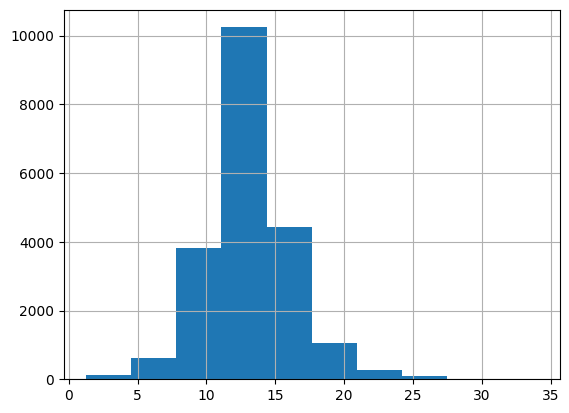

In [29]:
House_data['total_rooms_cbrt'].hist()

In [30]:
House_data['total_bedrooms_cbrt'] = np.cbrt(House_data['total_bedrooms'])

In [31]:
# Calculate skewness for each column
skewness = House_data.skew()

# Display skewness values
print("Skewness of each column:")
print(skewness)

Skewness of each column:
longitude             -0.297801
latitude               0.465953
housing_median_age     0.060331
total_rooms            4.147343
total_bedrooms         3.477023
population             4.935858
households             3.410438
median_income          1.646657
median_house_value     0.977763
longitude_cbrt        -0.288030
latitude_cbrt          0.428036
total_rooms_cbrt       0.629034
total_bedrooms_cbrt    0.557310
dtype: float64


In [32]:
House_data['population_cbrt'] = np.cbrt(House_data['population'])

In [33]:
# Calculate skewness for each column
skewness = House_data.skew()

# Display skewness values
print("Skewness of each column:")
print(skewness)

Skewness of each column:
longitude             -0.297801
latitude               0.465953
housing_median_age     0.060331
total_rooms            4.147343
total_bedrooms         3.477023
population             4.935858
households             3.410438
median_income          1.646657
median_house_value     0.977763
longitude_cbrt        -0.288030
latitude_cbrt          0.428036
total_rooms_cbrt       0.629034
total_bedrooms_cbrt    0.557310
population_cbrt        0.522587
dtype: float64


<Axes: >

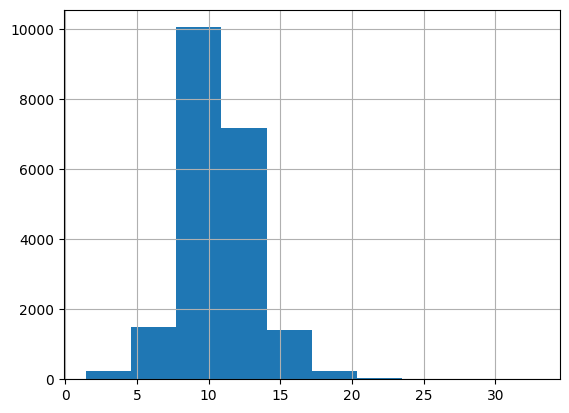

In [34]:
House_data['population_cbrt'].hist()

In [35]:
House_data['households_cbrt'] = np.cbrt(House_data['households'])

In [36]:
# Calculate skewness for each column
skewness = House_data.skew()

# Display skewness values
print("Skewness of each column:")
print(skewness)

Skewness of each column:
longitude             -0.297801
latitude               0.465953
housing_median_age     0.060331
total_rooms            4.147343
total_bedrooms         3.477023
population             4.935858
households             3.410438
median_income          1.646657
median_house_value     0.977763
longitude_cbrt        -0.288030
latitude_cbrt          0.428036
total_rooms_cbrt       0.629034
total_bedrooms_cbrt    0.557310
population_cbrt        0.522587
households_cbrt        0.478150
dtype: float64


In [37]:
House_data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  longitude_cbrt  latitude_cbrt  total_rooms_cbrt  \
0            NEAR BAY       -4.962790       3.358433          9.582840   
1            NEAR BAY       -4.962655       3.357842         19.219071   
2            NEAR BAY       -4.962926       3.357546         11.362573   
3            NEAR BAY       -4.963061       3.357546         10.840679   
4            NEAR BAY       -4.963061       3.357546         11.761495   
...               ...             ...            ...               ...   
20635          INLAND       -4.947313       3.405067         11.852358   
20636          INLAND       -4.948947       3.405355          8.866338   
20637          INLAND       -4.949083       3.403629         13.111468   
20638          INLAND       -4.950444       3.403629         12.298089   
20639          INLAND       -4.949355       3.401902         14.069383   

       total_bedrooms_cbrt  population_cbrt  households_cbrt  
0                 5.052774         6.854124         5.013298  
1                10.341536        13.390518        10.440327  
2                 5.748897         7.915783         5.614672  
3                 6.171006         8.232746         6.027650  
4                 6.542133         8.267029         6.374311  
...                    ...              ...              ...  
20635             7.204832         9.454072         6.910423  
20636             5.313293         7.087341         4.848808  
20637             7.856828        10.023279         7.565355  
20638             7.422914         9.049114         7.040581  
20639             8.508642        11.152156         8.092672  

[20640 rows x 16 columns]

In [38]:
House_data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [39]:
#Encoding ocean proximity(categorical data)
updated_House_data=pd.get_dummies(House_data,columns=['ocean_proximity'], drop_first=True)

In [40]:
updated_House_data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  longitude_cbrt  \
0       322.0       126.0         8.3252            452600.0       -4.962790   
1      2401.0      1138.0         8.3014            358500.0       -4.962655   
2       496.0       177.0         7.2574            352100.0       -4.962926   
3       558.0       219.0         5.6431            341300.0       -4.963061   
4       565.0       259.0         3.8462            342200.0       -4.963061   

   latitude_cbrt  total_rooms_cbrt  total_bedrooms_cbrt  population_cbrt  \
0       3.358433          9.582840             5.052774         6.854124   
1       3.357842         19.219071            10.341536        13.390518   
2       3.357546         11.362573             5.748897         7.915783   
3       3.357546         10.840679             6.171006         8.232746   
4       3.357546         11.761495             6.542133         8.267029   

   households_cbrt  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0         5.013298                       0                       0   
1        10.440327                       0                       0   
2         5.614672                       0                       0   
3         6.027650                       0                       0   
4         6.374311                       0                       0   

   ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
0                         1                           0  
1                         1                           0  
2                         1                           0  
3                         1                           0  
4                         1                           0

In [41]:
updated_House_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20640 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   longitude_cbrt              20640 non-null  float64
 10  latitude_cbrt               20640 non-null  float64
 11  total_rooms_cbrt            20640 non-null  float64
 12  total_bedrooms_cbrt         20640 non-null  float64
 13  population_cbrt             206

In [42]:
#checking missing values
updated_House_data.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
longitude_cbrt                0
latitude_cbrt                 0
total_rooms_cbrt              0
total_bedrooms_cbrt           0
population_cbrt               0
households_cbrt               0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64

In [43]:
#splitting data into predictants(X) and target(y)
X=updated_House_data.drop(columns=['median_house_value', 'longitude', 'latitude', 'total_rooms', 'total_bedrooms', 'population', 'households'], axis=1)
y=updated_House_data['median_house_value']

In [44]:
X

housing_median_age  median_income  longitude_cbrt  latitude_cbrt  \
0                    41.0         8.3252       -4.962790       3.358433   
1                    21.0         8.3014       -4.962655       3.357842   
2                    52.0         7.2574       -4.962926       3.357546   
3                    52.0         5.6431       -4.963061       3.357546   
4                    52.0         3.8462       -4.963061       3.357546   
...                   ...            ...             ...            ...   
20635                25.0         1.5603       -4.947313       3.405067   
20636                18.0         2.5568       -4.948947       3.405355   
20637                17.0         1.7000       -4.949083       3.403629   
20638                18.0         1.8672       -4.950444       3.403629   
20639                16.0         2.3886       -4.949355       3.401902   

       total_rooms_cbrt  total_bedrooms_cbrt  population_cbrt  \
0              9.582840             5.052774         6.854124   
1             19.219071            10.341536        13.390518   
2             11.362573             5.748897         7.915783   
3             10.840679             6.171006         8.232746   
4             11.761495             6.542133         8.267029   
...                 ...                  ...              ...   
20635         11.852358             7.204832         9.454072   
20636          8.866338             5.313293         7.087341   
20637         13.111468             7.856828        10.023279   
20638         12.298089             7.422914         9.049114   
20639         14.069383             8.508642        11.152156   

       households_cbrt  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0             5.013298                       0                       0   
1            10.440327                       0                       0   
2             5.614672                       0                       0   
3             6.027650                       0                       0   
4             6.374311                       0                       0   
...                ...                     ...                     ...   
20635         6.910423                       1                       0   
20636         4.848808                       1                       0   
20637         7.565355                       1                       0   
20638         7.040581                       1                       0   
20639         8.092672                       1                       0   

       ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
0                             1                           0  
1                             1                           0  
2                             1                           0  
3                             1                           0  
4                             1                           0  
...                         ...                         ...  
20635                         0                           0  
20636                         0                           0  
20637                         0                           0  
20638                         0                           0  
20639                         0                           0  

[20640 rows x 12 columns]

In [45]:
#Seperating data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [46]:
#get your train data by joining Xtrain with Y train
train_data=X_train.join(y_train)

In [47]:
#feature engineering i.e- adding descripture features with common characteristics
train_data['bedroom_ratio']=train_data['total_bedrooms_cbrt']/train_data['total_rooms_cbrt']
train_data['household_room']=train_data['total_rooms_cbrt']/train_data['households_cbrt']

In [48]:
train_data

housing_median_age  median_income  longitude_cbrt  latitude_cbrt  \
14196                33.0         3.2596       -4.891391       3.198111   
8267                 49.0         3.8125       -4.907084       3.232290   
17445                 4.0         4.1563       -4.938992       3.260440   
14265                36.0         1.9425       -4.892506       3.197459   
2271                 43.0         3.5542       -4.929682       3.325604   
...                   ...            ...             ...            ...   
11284                35.0         6.3700       -4.904314       3.232609   
11964                33.0         3.0500       -4.896958       3.240247   
5390                 36.0         2.9344       -4.910128       3.240564   
860                  15.0         5.7192       -4.959134       3.349543   
15795                52.0         2.5755       -4.965361       3.355179   

       total_rooms_cbrt  total_bedrooms_cbrt  population_cbrt  \
14196         14.621648             8.558990        13.200061   
8267          15.010363             9.232619        10.952967   
17445         12.379101             6.917396         9.708237   
14265         11.242547             7.159599        11.234629   
2271          13.355103             7.553689         9.561011   
...                 ...                  ...              ...   
11284         10.997244             5.857766         8.697784   
11964         14.555868             8.291344        12.057594   
5390          12.807824             8.286493        12.064468   
860           15.290629             8.420246        12.112370   
15795         16.167511            10.955745        13.784103   

       households_cbrt  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
14196         8.540750                       0                       0   
8267          9.109767                       0                       0   
17445         6.952053                       0                       0   
14265         7.080699                       0                       0   
2271          7.243156                       1                       0   
...                ...                     ...                     ...   
11284         6.009245                       0                       0   
11964         7.657414                       1                       0   
5390          8.077374                       0                       0   
860           8.237661                       0                       0   
15795        10.749144                       0                       0   

       ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  \
14196                         0                           1   
8267                          0                           1   
17445                         0                           1   
14265                         0                           1   
2271                          0                           0   
...                         ...                         ...   
11284                         0                           0   
11964                         0                           0   
5390                          0                           0   
860                           0                           0   
15795                         1                           0   

       median_house_value  bedroom_ratio  household_room  
14196            103000.0       0.585364        1.711986  
8267             382100.0       0.615083        1.647722  
17445            172600.0       0.558796        1.780640  
14265             93400.0       0.636831        1.587774  
2271              96500.0       0.565603        1.843824  
...                   ...            ...             ...  
11284            229200.0       0.532658        1.830054  
11964             97800.0       0.569622        1.900886  
5390             222100.0       0.646987        1.585642  
860              283500.0       0.550680        1.856186  
15795            325000.0     

In [49]:
train_data.corr()

housing_median_age  median_income  longitude_cbrt  \
housing_median_age                    1.000000      -0.121711       -0.101993   
median_income                        -0.121711       1.000000       -0.017119   
longitude_cbrt                       -0.101993      -0.017119        1.000000   
latitude_cbrt                         0.007013      -0.074842       -0.926516   
total_rooms_cbrt                     -0.360123       0.219700        0.028390   
total_bedrooms_cbrt                  -0.311301      -0.024337        0.060121   
population_cbrt                      -0.283856      -0.006054        0.107023   
households_cbrt                      -0.283947       0.004543        0.051200   
ocean_proximity_INLAND               -0.236347      -0.233297       -0.053665   
ocean_proximity_ISLAND                0.014071      -0.009272        0.009427   
ocean_proximity_NEAR BAY              0.253126       0.060205       -0.474119   
ocean_proximity_NEAR OCEAN            0.023190       0.021636        0.050712   
median_house_value                    0.103706       0.690647       -0.046494   
bedroom_ratio                         0.148361      -0.683740        0.095912   
household_room                       -0.213884       0.518066       -0.057902   

                            latitude_cbrt  total_rooms_cbrt  \
housing_median_age               0.007013         -0.360123   
median_income                   -0.074842          0.219700   
longitude_cbrt                  -0.926516          0.028390   
latitude_cbrt                    1.000000         -0.025724   
total_rooms_cbrt                -0.025724          1.000000   
total_bedrooms_cbrt             -0.063703          0.937692   
population_cbrt                 -0.127228          0.858582   
households_cbrt                 -0.078155          0.926884   
ocean_proximity_INLAND           0.349098          0.009131   
ocean_proximity_ISLAND          -0.016809         -0.006864   
ocean_proximity_NEAR BAY         0.362102         -0.017667   
ocean_proximity_NEAR OCEAN      -0.167547         -0.008461   
median_house_value              -0.140523          0.163863   
bedroom_ratio                   -0.113965         -0.240700   
household_room                   0.142385          0.230622   

                            total_bedrooms_cbrt  population_cbrt  \
housing_median_age                    -0.311301        -0.283856   
median_income                         -0.024337        -0.006054   
longitude_cbrt                         0.060121         0.107023   
latitude_cbrt                         -0.063703        -0.127228   
total_rooms_cbrt                       0.937692         0.858582   
total_bedrooms_cbrt                    1.000000         0.892621   
population_cbrt                        0.892621         1.000000   
households_cbrt                        0.977992         0.923496   
ocean_proximity_INLAND                -0.027058        -0.049803   
ocean_proximity_ISLAND                -0.001126        -0.010884   
ocean_proximity_NEAR BAY              -0.016777        -0.065834   
ocean_proximity_NEAR OCEAN             0.006695        -0.026495   
median_house_value                     0.054901        -0.027888   
bedroom_ratio                          0.097349         0.040266   
household_room                        -0.020553        -0.126488   

                            households_cbrt  ocean_proximity_INLAND  \
housing_median_age                -0.283947               -0.236347   
median_income                      0.004543               -0.233297   
longitude_cbrt                     0.051200               -0.053665   
latitude_cbrt                     -0.078155                0.349098   
total_rooms_cbrt                   0.926884                0.009131   
total_bedrooms_cbrt                0.977992               -0.027058   
population_cbrt                    0.923496               -0.049803   
households_cbrt                    1.000000               -0.0676

In [50]:
#split the train data back to xtrain and y train
X_train,y_train=train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']

In [51]:
#Do same or the test data
#get your train data by joining Xtest with Y test
test_data=X_test.join(y_test)

In [52]:
#feature engineering i.e- adding descripture features with common characteristics
test_data['bedroom_ratio']=test_data['total_bedrooms_cbrt']/test_data['total_rooms_cbrt']
test_data['household_room']=test_data['total_rooms_cbrt']/test_data['households_cbrt']

In [53]:
test_data

housing_median_age  median_income  longitude_cbrt  latitude_cbrt  \
20046                25.0         1.6812       -4.918823       3.303761   
3024                 30.0         2.5313       -4.925014       3.275422   
15663                52.0         3.4801       -4.965631       3.356067   
20484                17.0         5.7376       -4.914824       3.248481   
9814                 34.0         3.7250       -4.958727       3.320775   
...                   ...            ...             ...            ...   
15362                16.0         4.6050       -4.894037       3.219156   
16623                28.0         2.7266       -4.943770       3.282243   
18086                25.0         9.2298       -4.960353       3.341502   
2144                 36.0         2.7850       -4.929134       3.325303   
3665                 17.0         3.5521       -4.909989       3.246584   

       total_rooms_cbrt  total_bedrooms_cbrt  population_cbrt  \
20046         11.459847             8.132535        11.165540   
3024          14.330569             8.132535        11.610158   
15663         15.645865             8.132535        10.941842   
20484         14.503764             8.132535        11.946521   
9814          13.296915             8.132535        10.205738   
...                 ...                  ...              ...   
15362         14.682203             7.840595        11.054823   
16623         16.290275             9.604570        11.816658   
18086         16.019507             8.133187        11.659406   
2144          13.584744             7.752861        10.705695   
3665          12.135049             7.736188        11.866578   

       households_cbrt  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
20046         7.107194                       1                       0   
3024          8.358678                       1                       0   
15663         9.875113                       0                       0   
20484         7.910460                       0                       0   
9814          7.536122                       0                       0   
...                ...                     ...                     ...   
15362         7.674430                       0                       0   
16623         8.900130                       0                       0   
18086         8.281635                       0                       0   
2144          7.796975                       1                       0   
3665          7.651725                       0                       0   

       ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  \
20046                         0                           0   
3024                          0                           0   
15663                         1                           0   
20484                         0                           0   
9814                          0                           1   
...                         ...                         ...   
15362                         0                           0   
16623                         0                           1   
18086                         0                           0   
2144                          0                           0   
3665                          0                           0   

       median_house_value  bedroom_ratio  household_room  
20046             47700.0       0.709655        1.612429  
3024              45800.0       0.567496        1.714454  
15663            500001.0       0.519788        1.584373  
20484            218600.0       0.560719        1.833492  
9814             278000.0       0.611611        1.764424  
...                   ...            ...             ...  
15362            263300.0       0.534020        1.913133  
16623            266800.0       0.589589        1.830341  
18086            500001.0       0.507705        1.934341  
2144              72300.0       0.570703        1.742310  
3665             151500.0     

In [54]:
#spllit the test data back to xtest and y test
X_test,y_test=test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']

In [55]:
test_data.drop(columns=['total_rooms_cbrt','total_bedrooms_cbrt','households_cbrt', 'longitude_cbrt'], inplace=True)

In [56]:
test_data

housing_median_age  median_income  latitude_cbrt  population_cbrt  \
20046                25.0         1.6812       3.303761        11.165540   
3024                 30.0         2.5313       3.275422        11.610158   
15663                52.0         3.4801       3.356067        10.941842   
20484                17.0         5.7376       3.248481        11.946521   
9814                 34.0         3.7250       3.320775        10.205738   
...                   ...            ...            ...              ...   
15362                16.0         4.6050       3.219156        11.054823   
16623                28.0         2.7266       3.282243        11.816658   
18086                25.0         9.2298       3.341502        11.659406   
2144                 36.0         2.7850       3.325303        10.705695   
3665                 17.0         3.5521       3.246584        11.866578   

       ocean_proximity_INLAND  ocean_proximity_ISLAND  \
20046                       1                       0   
3024                        1                       0   
15663                       0                       0   
20484                       0                       0   
9814                        0                       0   
...                       ...                     ...   
15362                       0                       0   
16623                       0                       0   
18086                       0                       0   
2144                        1                       0   
3665                        0                       0   

       ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  \
20046                         0                           0   
3024                          0                           0   
15663                         1                           0   
20484                         0                           0   
9814                          0                           1   
...                         ...                         ...   
15362                         0                           0   
16623                         0                           1   
18086                         0                           0   
2144                          0                           0   
3665                          0                           0   

       median_house_value  bedroom_ratio  household_room  
20046             47700.0       0.709655        1.612429  
3024              45800.0       0.567496        1.714454  
15663            500001.0       0.519788        1.584373  
20484            218600.0       0.560719        1.833492  
9814             278000.0       0.611611        1.764424  
...                   ...            ...             ...  
15362            263300.0       0.534020        1.913133  
16623            266800.0       0.589589        1.830341  
18086            500001.0       0.507705        1.934341  
2144              72300.0       0.570703        1.742310  
3665             151500.0       0.637508        1.585923  

[4128 rows x 11 columns]

In [57]:
#checking missing values
test_data.isnull().sum()

housing_median_age            0
median_income                 0
latitude_cbrt                 0
population_cbrt               0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
median_house_value            0
bedroom_ratio                 0
household_room                0
dtype: int64

In [58]:
train_data.drop(columns=['total_rooms_cbrt','total_bedrooms_cbrt','households_cbrt', 'longitude_cbrt'], inplace=True)

In [59]:
train_data

housing_median_age  median_income  latitude_cbrt  population_cbrt  \
14196                33.0         3.2596       3.198111        13.200061   
8267                 49.0         3.8125       3.232290        10.952967   
17445                 4.0         4.1563       3.260440         9.708237   
14265                36.0         1.9425       3.197459        11.234629   
2271                 43.0         3.5542       3.325604         9.561011   
...                   ...            ...            ...              ...   
11284                35.0         6.3700       3.232609         8.697784   
11964                33.0         3.0500       3.240247        12.057594   
5390                 36.0         2.9344       3.240564        12.064468   
860                  15.0         5.7192       3.349543        12.112370   
15795                52.0         2.5755       3.355179        13.784103   

       ocean_proximity_INLAND  ocean_proximity_ISLAND  \
14196                       0                       0   
8267                        0                       0   
17445                       0                       0   
14265                       0                       0   
2271                        1                       0   
...                       ...                     ...   
11284                       0                       0   
11964                       1                       0   
5390                        0                       0   
860                         0                       0   
15795                       0                       0   

       ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  \
14196                         0                           1   
8267                          0                           1   
17445                         0                           1   
14265                         0                           1   
2271                          0                           0   
...                         ...                         ...   
11284                         0                           0   
11964                         0                           0   
5390                          0                           0   
860                           0                           0   
15795                         1                           0   

       median_house_value  bedroom_ratio  household_room  
14196            103000.0       0.585364        1.711986  
8267             382100.0       0.615083        1.647722  
17445            172600.0       0.558796        1.780640  
14265             93400.0       0.636831        1.587774  
2271              96500.0       0.565603        1.843824  
...                   ...            ...             ...  
11284            229200.0       0.532658        1.830054  
11964             97800.0       0.569622        1.900886  
5390             222100.0       0.646987        1.585642  
860              283500.0       0.550680        1.856186  
15795            325000.0       0.677640        1.504074  

[16512 rows x 11 columns]

In [60]:
#checking missing values
train_data.isnull().sum()

housing_median_age            0
median_income                 0
latitude_cbrt                 0
population_cbrt               0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
median_house_value            0
bedroom_ratio                 0
household_room                0
dtype: int64

In [61]:
train_data.dtypes

housing_median_age            float64
median_income                 float64
latitude_cbrt                 float64
population_cbrt               float64
ocean_proximity_INLAND          uint8
ocean_proximity_ISLAND          uint8
ocean_proximity_NEAR BAY        uint8
ocean_proximity_NEAR OCEAN      uint8
median_house_value            float64
bedroom_ratio                 float64
household_room                float64
dtype: object

In [62]:
#drop the null values cos we cant guess blindly since each variable is real
train_data.dropna(inplace=True)

In [63]:
#drop the null values cos we cant guess blindly since each variable is real
test_data.dropna(inplace=True)

In [64]:
# Scale numeric features after splitting to prevent data leakage
scaler = StandardScaler()

In [65]:
X_train_s=scaler.fit_transform(X_train)

In [66]:
X_test_s=scaler.transform(X_test)

In [67]:
#intializing the regression model
model=LinearRegression()

In [68]:
#Training the Linear Regression with training data
model.fit(X_train,y_train)

LinearRegression()

In [69]:
model.score(X_test,y_test)

0.6255484618012845

In [70]:
model.fit(X_train_s,y_train)

LinearRegression()

In [71]:
#The scaled xtest may perorm better......
model.score(X_test_s,y_test)

0.6255484618012848

In [72]:
forest=RandomForestRegressor()

In [73]:
forest.fit(X_train,y_train)

RandomForestRegressor()

In [74]:
forest.score(X_test,y_test)

0.8107191484925553

In [75]:
# Define models and hyperparameters
models = {
    "XGBoost": (XGBRegressor(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }),
    "Random Forest": (RandomForestRegressor(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }),
    "SVM": (SVR(), {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }),
    "Linear Regression": (LinearRegression(), {})
}

# Perform GridSearchCV for each model
best_models = {}
for model_name, (model, params) in models.items():
    print(f"Running GridSearchCV for {model_name}...")
    grid = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_models[model_name] = {
        "best_estimator": grid.best_estimator_,
        "best_params": grid.best_params_,
        "best_score": -grid.best_score_  # Negated to show MSE directly
    }


Running GridSearchCV for XGBoost...
Running GridSearchCV for Random Forest...
Running GridSearchCV for SVM...
Running GridSearchCV for Linear Regression...


In [76]:
# Compare results
print("\nBest Models and Parameters:")
for model_name, results in best_models.items():
    print(f"{model_name}:")
    print(f"  Best Parameters: {results['best_params']}")
    print(f"  Best CV MSE: {results['best_score']:.4f}")



Best Models and Parameters:
XGBoost:
  Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
  Best CV MSE: 2197966669.0086
Random Forest:
  Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
  Best CV MSE: 2479262892.5650
SVM:
  Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
  Best CV MSE: 5840498265.7355
Linear Regression:
  Best Parameters: {}
  Best CV MSE: 4343332268.1777


In [77]:
# Evaluate the best model on the test set
print("\nTest Set Evaluation:")
for model_name, results in best_models.items():
    best_model = results["best_estimator"]
    y_pred = best_model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_pred)
    print(f"{model_name} Test MSE: {test_mse:.4f}")


Test Set Evaluation:
XGBoost Test MSE: 2211244627.2899
Random Forest Test MSE: 2479282617.7541
SVM Test MSE: 5762856664.7770
Linear Regression Test MSE: 4906846575.7171


In [80]:
# it is clearly seen that xgboost has lowest MSE CV scores
# Initialize XGBoost with the best parameters

xgb_model = XGBRegressor(
    learning_rate=0.2,
    max_depth=7,
    n_estimators=200,
    random_state=42
)

In [81]:
# Train the model
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [82]:
# Make predictions
y_pred = xgb_model.predict(X_test)

In [84]:
# Train the model
xgb_model.score(X_test, y_test)

0.831255381792465

In [87]:
from sklearn.metrics import r2_score

In [88]:
r2_xgb = r2_score(y_test,y_pred)

In [89]:
r2_xgb

0.831255381792465